In [4]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [5]:
df = pd.read_csv('poly_regression.csv')
data = df.values
X = data[:,0]
Y = data[:,1]
X = X.reshape(X.shape[0],1)
Y = Y.reshape(Y.shape[0],1)

In [6]:
X_tr = X[0:100,0]
Y_tr = Y[0:100,0]
X_test = X[100:200,0]
Y_test = Y[100:200,0]


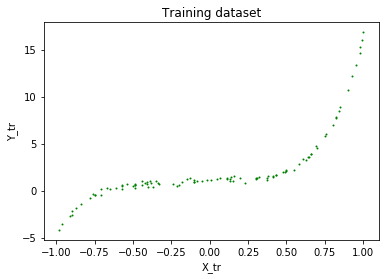

In [8]:
plt.scatter(X_tr,Y_tr,c='g',s=1)

plt.title("Training dataset")
plt.xlabel('X_tr')
plt.ylabel('Y_tr')
plt.show()

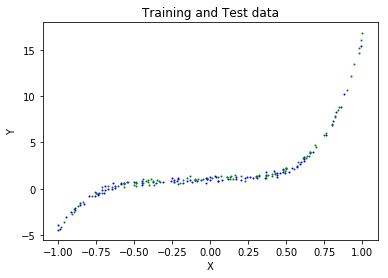

In [9]:
plt.scatter(X_test,Y_test,c='b',s=1)
plt.scatter(X_tr,Y_tr,c='g',s=1)

plt.title("Training and Test data")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

1
[ 2.16579369  5.43898469]
2.9647209839
--


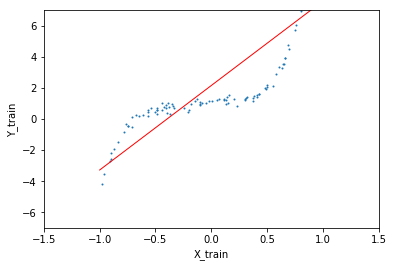

2
[ 0.44618458  5.09033863  5.2804055 ]
1.77907322177
--


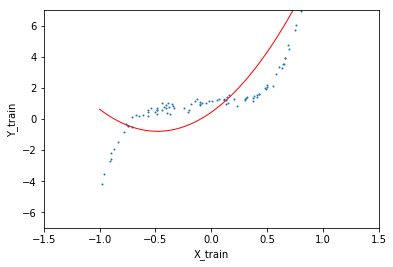

3
[  0.55893574  -1.59120711   4.41133827  11.4152637 ]
0.17853588958
--


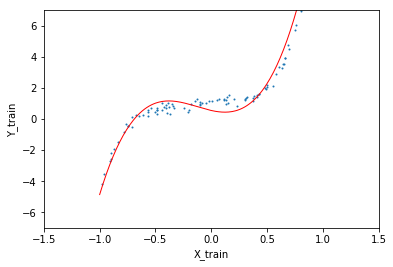

4
[  1.11567721  -1.42081481  -0.76247405  10.96628796   5.91842245]
0.0733507361225
--


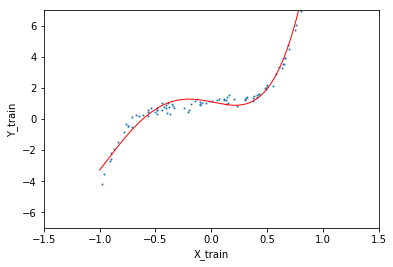

5
[ 1.0610661   0.63386696 -0.03763316  1.25344472  4.90089066  8.70669821]
0.0182400849026
--


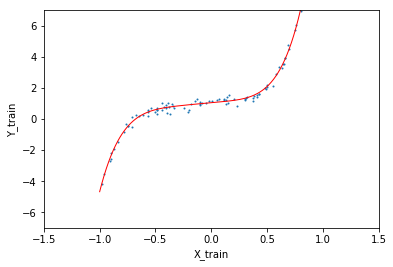

6
[ 1.10024436  0.6471299  -0.80610583  1.12405162  7.22629427  8.86675156
 -1.70938989]
0.0176826774353
--


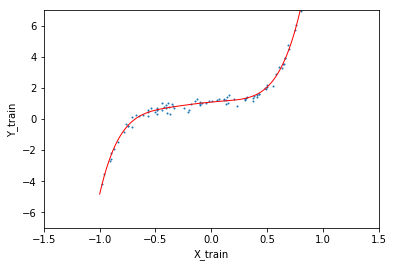

7
[ 1.10059775  0.62659101 -0.81238938  1.30376005  7.24936749  8.47401471
 -1.73008737  0.24190378]
0.0176801676072
--


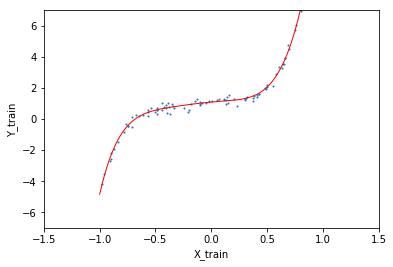

8
[  1.16097512   0.68402459  -2.99767478   0.6251038   19.58398357
  10.22193995 -23.48818259  -0.99783568  11.7822758 ]
0.0161296019313
--


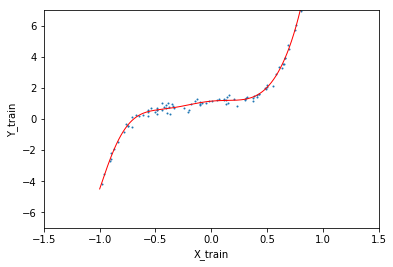

9
[  1.15862069   1.08395439  -2.94350455  -4.93290247  19.03422569
  31.73157531 -22.15100103 -31.76966732  10.87134602  14.57280009]
0.015526443071
--


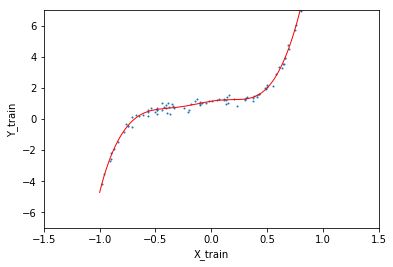

10
[  1.15124057   1.07557812  -2.52086805  -4.82276913  15.36571333
  31.28054108 -11.12927924 -31.06448332  -2.53207418  14.20267549
   5.66573484]
0.0155063589002
--


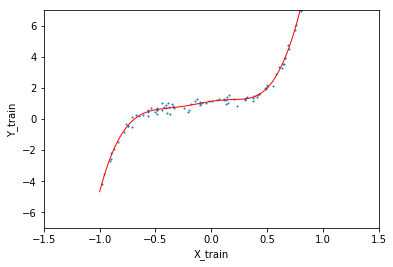

11
[  1.15223364   1.0262865   -2.5795059   -3.7516036   15.92797761
  24.68916766 -12.93081763 -14.68718321  -0.22630092  -3.40624769
   4.64402262   6.8239065 ]
0.0154983075793
--


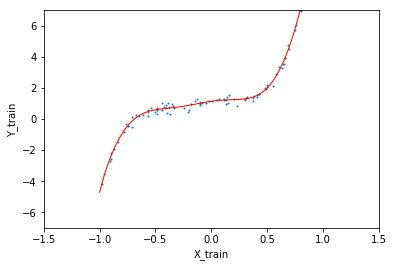

12
[   1.19105467    1.11367763   -5.59154593   -5.86108421   52.35202884
   39.68869203 -176.35349365  -56.22165194  332.4329514    45.09075185
 -307.18074474  -13.25865233  109.34527323]
0.0151036473663
--


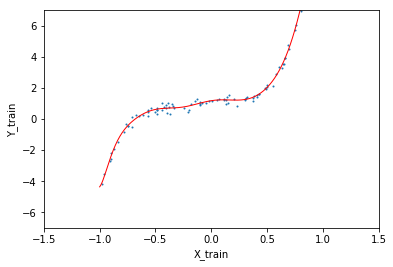

13
[   1.18545065    1.40559991   -5.10858043  -15.56160541   45.57604055
  127.06699428 -140.79126873 -386.27377639  249.44407877  643.179629
 -219.96781013 -528.55845051   75.69274437  169.51089668]
0.0148503426732
--


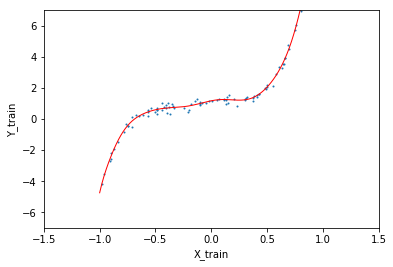

14
[   1.20248234    1.42986001   -6.7358691   -16.3343776    71.71364014
  134.82497092 -303.87222339 -419.42077147  739.90125936  710.98477892
 -979.68154429 -593.95277466  659.1416059   193.33312811 -175.76425109]
0.0147831481085
--


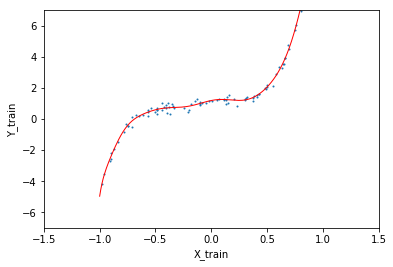

15
[  1.20948917e+00   1.14671114e+00  -7.43921665e+00  -3.60223717e+00
   8.34236096e+01  -1.56334987e+01  -3.80743753e+02   3.49527340e+02
   9.82608812e+02  -1.29074768e+03  -1.37403443e+03   2.18373914e+03
   9.76990585e+02  -1.76285322e+03  -2.76295391e+02   5.49520948e+02]
0.0146010219226
--


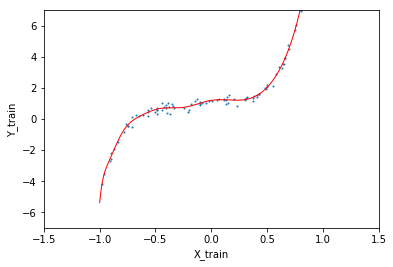

16
[  1.23534904e+00   1.20936723e+00  -1.04104908e+01  -6.61910730e+00
   1.45640768e+02   2.39309929e+01  -8.94684491e+02   1.27131672e+02
   3.08882808e+03  -6.64692558e+02  -6.07303895e+03   1.25704505e+03
   6.78438912e+03  -1.07325566e+03  -4.01035861e+03   3.46155220e+02
   9.74346981e+02]
0.0144619504304
--


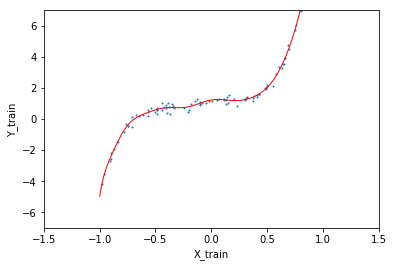

17
[  1.23507837e+00   1.22645227e+00  -1.03772358e+01  -7.59477184e+00
   1.44898075e+02   3.85720056e+01  -8.87852784e+02   2.98341074e+01
   3.05750162e+03  -3.23394686e+02  -5.99554061e+03   5.80113130e+02
   6.67946537e+03  -3.10699460e+02  -3.93728680e+03  -1.08577724e+02
   9.53892808e+02   1.11439994e+02]
0.0144615034716
--


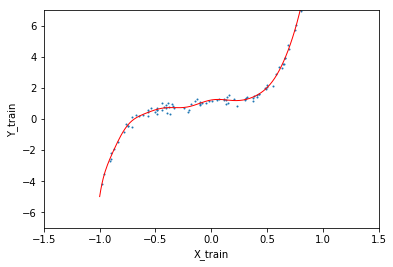

18
[  1.22356150e+00   1.17670164e+00  -8.77903370e+00  -4.72079698e+00
   1.01458181e+02  -5.90600941e+00  -4.22980807e+02   3.37692906e+02
   5.50867961e+02  -1.45248205e+03   1.60371190e+03   2.92516541e+03
  -6.84038502e+03  -3.07669448e+03   1.00576349e+04   1.61645976e+03
  -6.84375644e+03  -3.29896848e+02   1.80707655e+03]
0.0144327448892
--


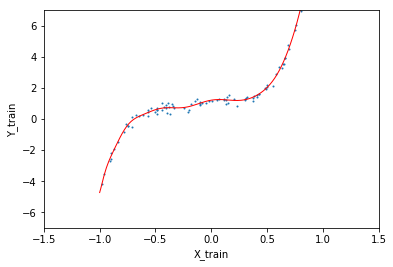

19
[  1.22604674e+00   7.70229436e-01  -9.28624857e+00   2.31736702e+01
   1.19628465e+02  -5.21527480e+02  -6.63614883e+02   4.64295015e+03
   2.07780962e+03  -2.09199163e+04  -3.65380486e+03   5.46216826e+04
   3.53472721e+03  -8.59901319e+04  -1.66370364e+03   8.05628726e+04
   2.01473962e+02  -4.13895142e+04   6.12725228e+01   8.98080395e+03]
0.0142662597503
--


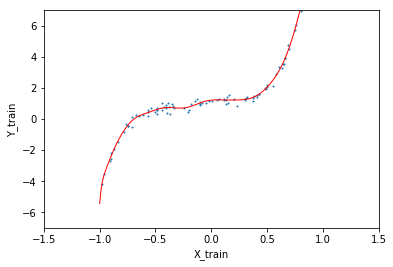

In [26]:
testcosts = []
traincosts = []
for d in range(1,20):
    print(d)
    theta = poly.polyfit(X_tr,Y_tr,d)
    yhat = poly.polyval(X_test, theta)
    testcost = np.sum(np.square(Y_test - yhat)) * 1/(2 * Y_test.shape[0])
    testcosts.append(testcost)
    print(theta)
    yhat_train = poly.polyval(X_tr,theta)
    traincost = np.sum(np.square(Y_tr - yhat_train)) * 1/(2 * Y_tr.shape[0])
    print(traincost)
    print('--')
    traincosts.append(traincost)
    
    xp = np.linspace(-1,1,200)
    yp_hat = poly.polyval(xp,theta)
    plt.xlim(-1.5,1.5)
    plt.ylim(-7,7)
    plt.plot(xp,yp_hat,'r-',linewidth=1)

    # Plot data
    plt.scatter(X_tr,Y_tr,s=1)
    plt.xlabel('X_train')
    plt.ylabel('Y_train')
    plt.xlim([-1.5,1.5])

    plt.show()

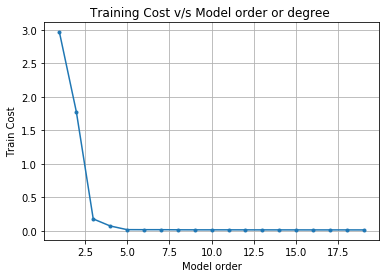

In [28]:
degree = np.array(range(1,20))
plt.plot(degree,traincosts,'.-')
plt.xlabel('Model order')
plt.ylabel('Train Cost')
plt.title('Training Cost v/s Model order or degree ')
plt.grid()   

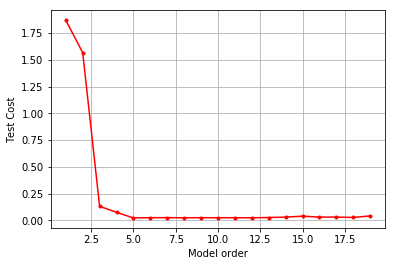

In [29]:
plt.plot(degree,testcosts,'.-',color='r')
plt.xlabel('Model order')
plt.ylabel('Test Cost')
plt.grid()